# Grupo MegaTech - Projeto MedVirtua

Amorgan Mendes Lopes  RM:98552\
Gustavo Godoi da Silva  RM:99585\
Matheus Chagas de Moraes Sampaio  RM:550489\
Melissa de Oliveira Pecoraro  RM:98698\
Roberto Menezes dos Santos  RM:552520

O foco do nosso projeto consiste na criação de uma das maiores plataformas de informação relacionada a saúde, dando a quem acessa todas as informações necessárias para ter uma saúde de ferro e evitar quaisquer futuras ameaças.
Um local que entregará ao usuário cada detalhe sobre as doenças que assolam a região (ou o mundo) e as formas de prevenção/tratamento. Pesquisando encontramos que uma das principais doenças são as doenças cardíacas, então pensando nisso utilizamos um data set que nos dá informações como: Age Sex	ChestPainType	RestingBP	Cholesterol	FastingBS, etc e com isso foram feitos dois modelos preditivos de Classificação, utilizando Random Forest Classifier, com uma ML prevendo se existe doença cardíaca ou não, com 11 dados que restam na tabela de entrada e a outra prevendo ExercícioAngina, com os mesmos 11 dados de entrada também. Os dois modelos obtiveram uma acurácia de 80% pra cima, o que pode ser concluído que possuem um bom desempenho.

O arquivo csv está na pasta no projeto e abaixo segue o link do data set
https://www.kaggle.com/code/juniorbueno/heart-failure-scipy-anova-tukey

### Análise estatística exploratória

In [9]:
import pandas as pd

In [10]:
data = pd.read_csv('heart.csv')

In [11]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


**Idade:** idade do paciente [anos]\
**Sexo:** sexo do paciente [M: Masculino, F: Feminino]\
**ChestPainType:** tipo de dor torácica [TA: Angina típica, ATA: Angina atípica, NAP: Dor não anginosa, ASY: Assintomática]\
**RestingBP/PA em repouso:** pressão arterial em repouso [mm Hg]\
**Colesterol:** colesterol sérico [mm/dl]\
**BS em jejum:** glicemia em jejum [1: se BS em jejum > 120 mg/dl, 0: caso contrário]\
**ECG em repouso:** resultados do eletrocardiograma em repouso [Normal: Normal, ST: com anormalidade das ondas ST-T (inversões das ondas T e/ou elevação ou depressão de ST > 0,05 mV), HVE: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes]\
**MaxHR:** frequência cardíaca máxima alcançada [valor numérico entre 60 e 202]\
**ExercícioAngina:** angina induzida por exercício [Y: Sim, N: Não]\
**Oldpeak:** oldpeak = ST [Valor numérico medido na depressão]\
**ST_Slope:** a inclinação do segmento ST do pico do exercício [Up: subida, Flat: flat, Down: downsloping]\
**HeartDisease:** classe de saída [1: doença cardíaca, 0: Normal]

### Label Encoding

Utilizei Label Encoding pois não obtive muita diferença na acurácia nos dois modelos em relação ao One Hot Encoding e me trouxe menor chance de ocorrer um
Overfitting.

In [12]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
data['Sex'] = label.fit_transform(data['Sex'])
data['RestingECG']=label.fit_transform(data['RestingECG'])
data['ChestPainType']=label.fit_transform(data['ChestPainType'])
data['ExerciseAngina']=label.fit_transform(data['ExerciseAngina'])
data['ST_Slope']=label.fit_transform(data['ST_Slope'])

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [13]:
data.ChestPainType.unique()

array([1, 2, 0, 3])

In [14]:
data.ST_Slope.unique()

array([2, 1, 0])

In [15]:
data.RestingECG.unique()

array([1, 2, 0])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [17]:
data['HeartDisease']

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [18]:
type(data)

pandas.core.frame.DataFrame

In [19]:
type(data['HeartDisease'])

pandas.core.series.Series

In [20]:
list(data['HeartDisease'])

[0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,


In [21]:
list(data['HeartDisease']).count(0)

410

In [22]:
list(data['HeartDisease']).count(1)

508

In [23]:
data_0 = data[data['HeartDisease']==0]

In [24]:
data_1 = data[data['HeartDisease']==1]

In [25]:
data_0['HeartDisease'].describe()

count    410.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: HeartDisease, dtype: float64

In [26]:
data_1['HeartDisease'].describe()

count    508.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: HeartDisease, dtype: float64

In [27]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


### Gráficos

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

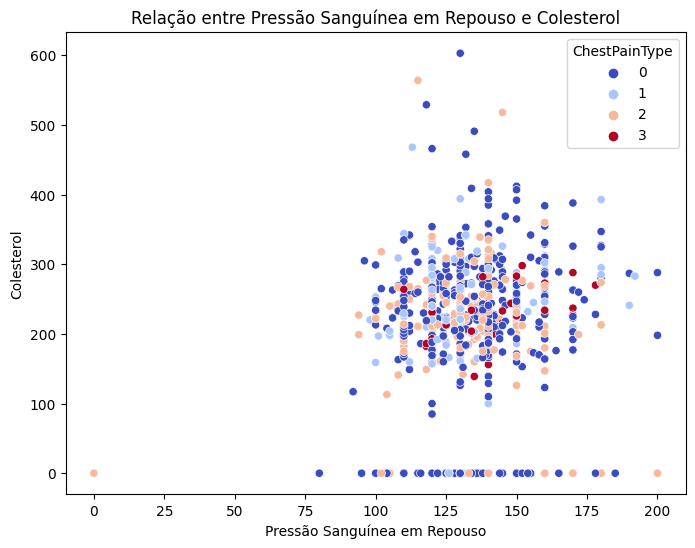

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RestingBP', y='Cholesterol', hue='ChestPainType', data=data, palette='coolwarm')
plt.title('Relação entre Pressão Sanguínea em Repouso e Colesterol')
plt.xlabel('Pressão Sanguínea em Repouso')
plt.ylabel('Colesterol')
plt.show()

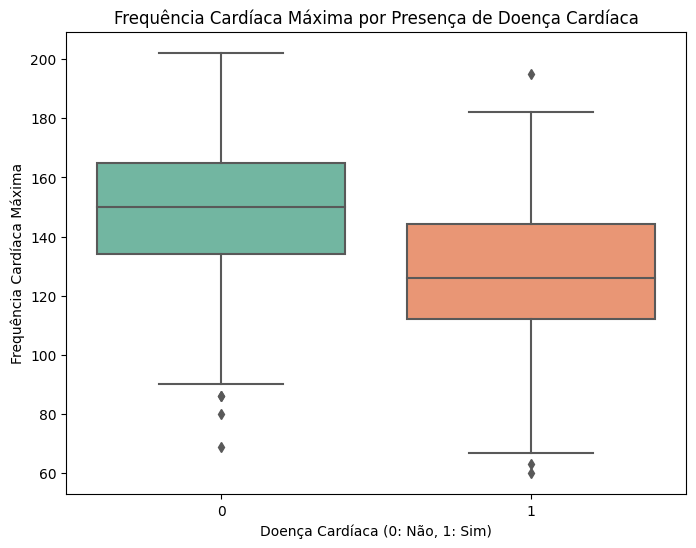

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='HeartDisease', y='MaxHR', data=data, palette='Set2')
plt.title('Frequência Cardíaca Máxima por Presença de Doença Cardíaca')
plt.xlabel('Doença Cardíaca (0: Não, 1: Sim)')
plt.ylabel('Frequência Cardíaca Máxima')
plt.show()

<ipython-input-31-2e7b2e855123>:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(ax=axes[0][0],
<ipython-input-31-2e7b2e855123>:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(ax=axes[0][1],
<ipython-input-31-2e7b2e855123>:24: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(ax=axes[1][0],
<ipython-input-31-2e7b2e855123>:34: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(ax=axes[1][1],


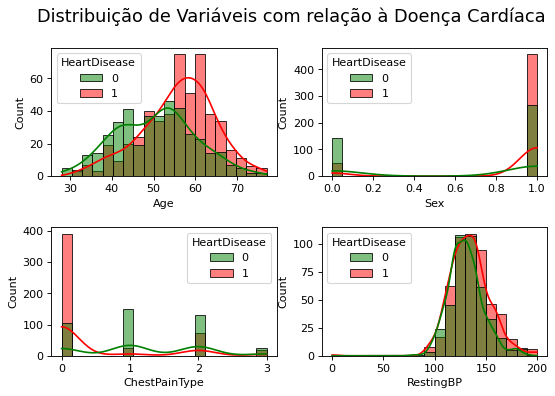

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(8, 5), dpi=80)
plt.suptitle('Distribuição de Variáveis com relação à Doença Cardíaca', fontsize=16)

sns.histplot(ax=axes[0][0],
            data=data,
            x = data['Age'],
            kde=True,
            bins=20,
            linewidth=0.7,
            hue = data['HeartDisease'],
            palette=["g", "r", "b"]
            )

sns.histplot(ax=axes[0][1],
            data=data,
            palette=["g", "r", "b"],
            x = data['Sex'],
            kde=True,
            bins=20,
            linewidth=0.7,
            hue = data['HeartDisease']
            )

sns.histplot(ax=axes[1][0],
            data=data,
            x = data['ChestPainType'],
            kde=True,
            bins=20,
            linewidth=0.7,
            hue = data['HeartDisease'],
            palette=["g", "r", "b"]
            )

sns.histplot(ax=axes[1][1],
            data=data,
            palette=["g", "r", "b"],
            x = data['RestingBP'],
            kde=True,
            bins=20,
            linewidth=0.7,
            hue = data['HeartDisease']
            )

plt.subplots_adjust(wspace=0.2, hspace=0.4)

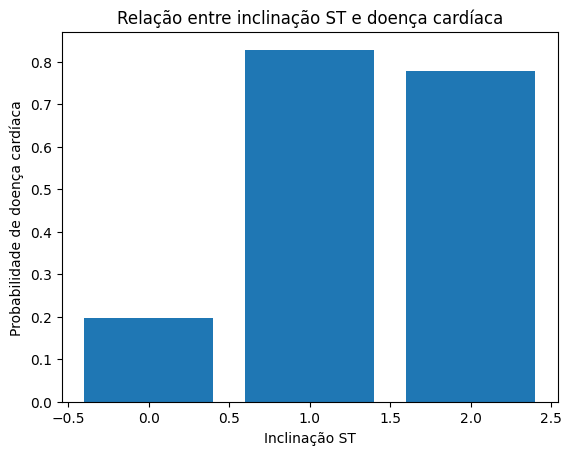

In [32]:
plt.bar(data["ST_Slope"].unique(), data.groupby("ST_Slope")["HeartDisease"].mean())
plt.title("Relação entre inclinação ST e doença cardíaca")
plt.xlabel("Inclinação ST")
plt.ylabel("Probabilidade de doença cardíaca")
plt.show()

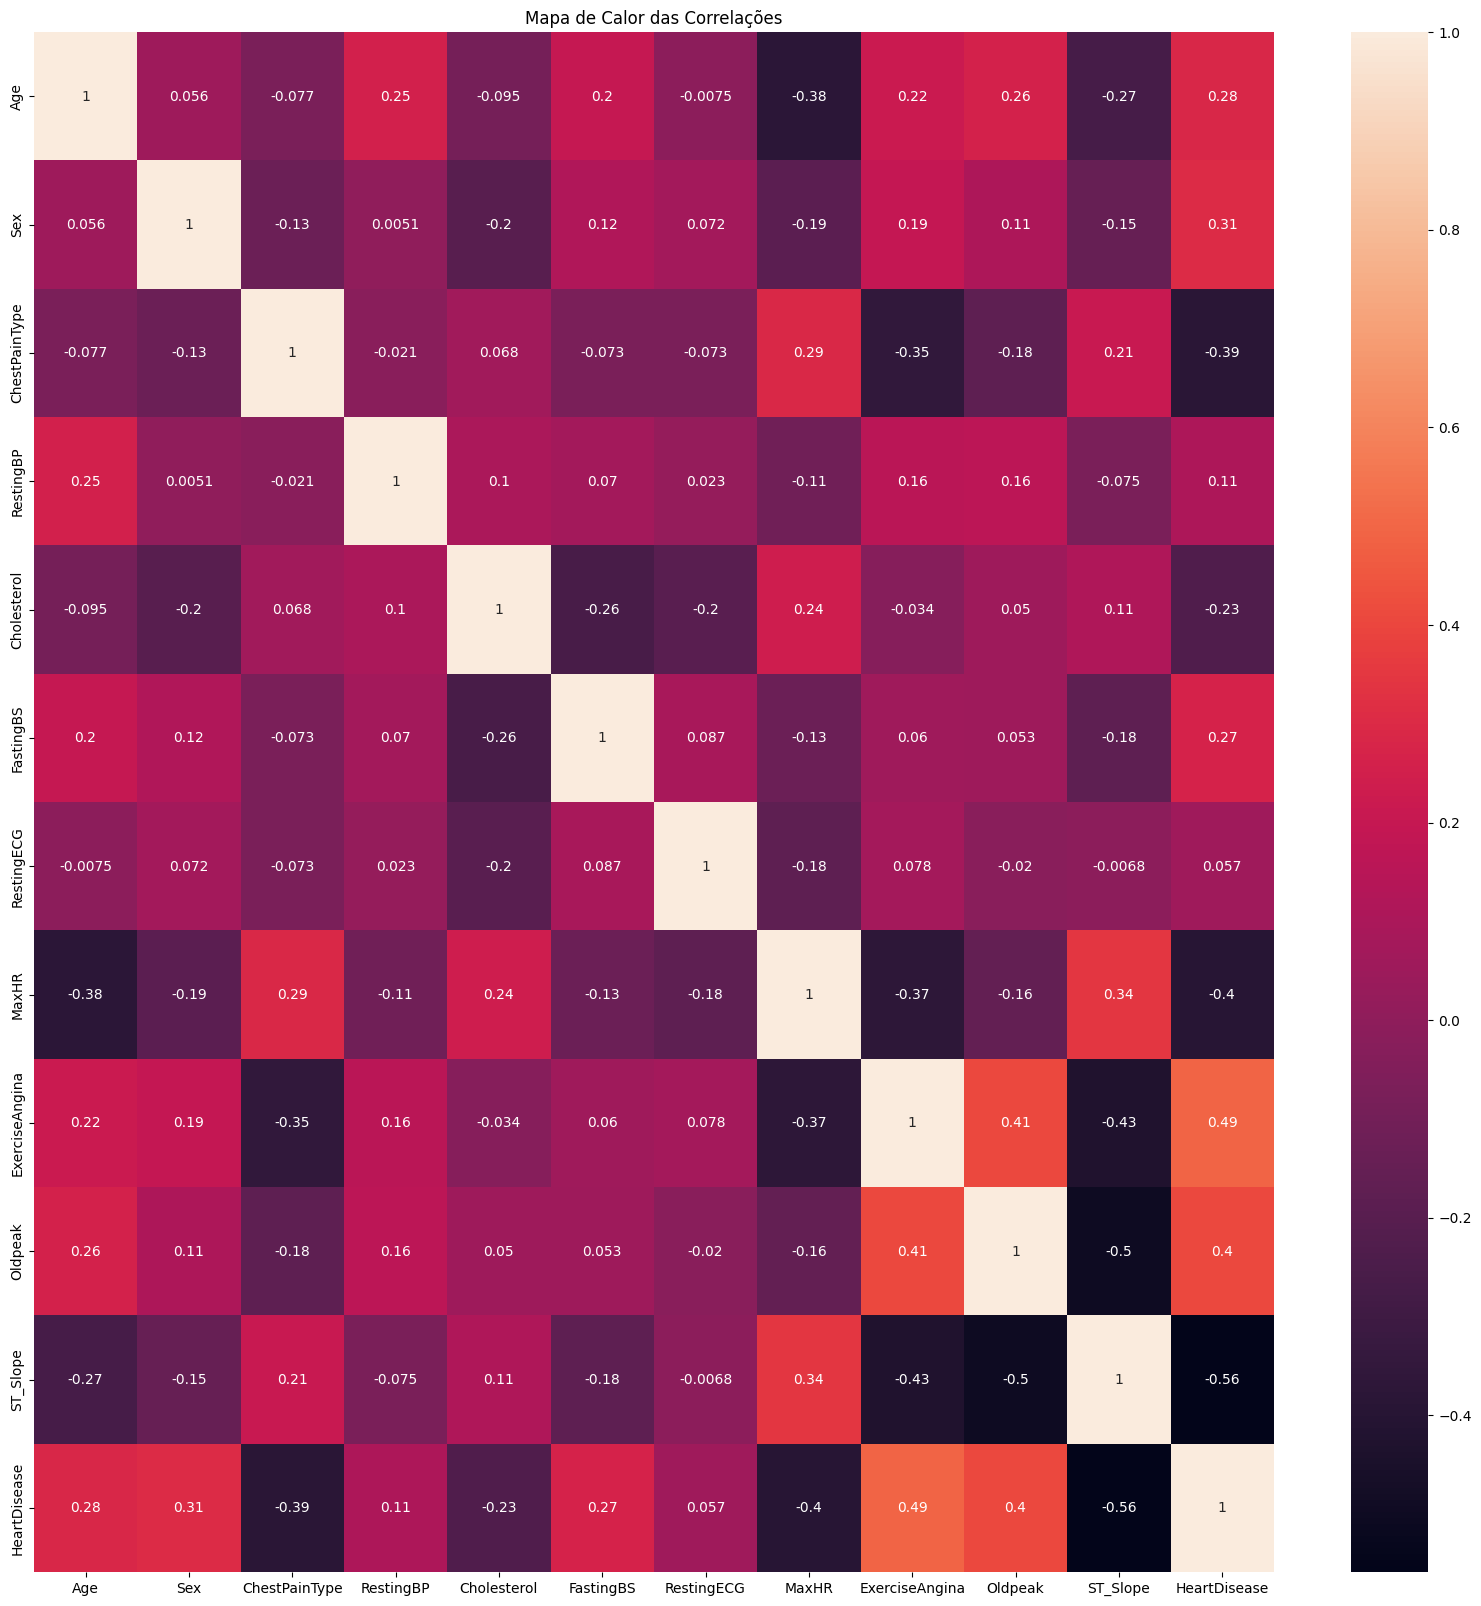

In [33]:
correlations = data.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)
ax.set_title('Mapa de Calor das Correlações')
correlations.round(2)
plt.show()

## Primeiro modelo preditivo de classificação prevendo se possui ou não doença cardíaca (HeartDisease)

### Separar os dados - Classificação

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# Divisão dos dados em treinamento e teste
x = data.drop(columns = 'HeartDisease')
y = data['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [36]:
x_train.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,1,2,120,240,1,1,194,0,0.8,0
25,36,1,2,130,209,0,1,178,0,0.0,2
84,56,1,0,150,213,1,1,125,1,1.0,1
10,37,0,2,130,211,0,1,142,0,0.0,2
344,51,1,0,120,0,1,1,104,0,0.0,1


In [37]:
y_train.head(5)

795    0
25     0
84     1
10     0
344    1
Name: HeartDisease, dtype: int64

In [38]:
data.head(85)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
80,55,1,2,110,277,0,1,160,0,0.0,2,0
81,54,1,1,120,238,0,1,154,0,0.0,2,0
82,63,1,0,150,223,0,1,115,0,0.0,1,1
83,52,1,1,160,196,0,1,165,0,0.0,2,0


### Transformar os dados - Classificação

In [39]:
from sklearn.preprocessing import MinMaxScaler

# Escalonamento
scaler = MinMaxScaler()

# Treinando o escalonador
scaler.fit(x_train)

# Usando o escalonador treinado para transformar os dados
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Treinar o algoritmo - Classificação

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### Testar e avaliar - Classificação

In [42]:
y_pred_class = model.predict(x_test_scaled)

In [43]:
y_pred_class

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

In [44]:
from sklearn.metrics import accuracy_score, classification_report

In [45]:
# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Acurácia: {accuracy}')
print(classification_report(y_test, y_pred_class))

Acurácia: 0.8804347826086957
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



### Produção - Classificação

In [46]:
import pickle

In [47]:
with open('meu_modelo_serializado_class.pickle', 'wb') as f:
    pickle.dump(model, f)

In [48]:
with open('meu_modelo_serializado_class.pickle', 'rb') as f:
    modelo_carregado_class = pickle.load(f)

In [49]:
modelo_carregado_class.predict([[56,1,0,150,213,1,1,125,1,1.0,1]])

array([1])

## Segundo modelo preditivo de classificação prevendo:
ExercícioAngina (angina induzida por exercício)

### Separar os dados - Classificação

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# Divisão dos dados em treinamento e teste
x = data.drop(columns = 'ExerciseAngina')
y = data['ExerciseAngina']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [52]:
x_train.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease
795,42,1,2,120,240,1,1,194,0.8,0,0
25,36,1,2,130,209,0,1,178,0.0,2,0
84,56,1,0,150,213,1,1,125,1.0,1,1
10,37,0,2,130,211,0,1,142,0.0,2,0
344,51,1,0,120,0,1,1,104,0.0,1,1


In [53]:
y_train.head(5)

795    0
25     0
84     1
10     0
344    0
Name: ExerciseAngina, dtype: int64

In [54]:
data.head(26)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


### Transformar os dados - Classificação

In [55]:
from sklearn.preprocessing import MinMaxScaler

# Escalonamento
scaler = MinMaxScaler()

# Treinando o escalonador
scaler.fit(x_train)

# Usando o escalonador treinado para transformar os dados
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Treinar o algoritmo - Classificação

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### Testar e avaliar - Classificação

In [58]:
y_pred_class = model.predict(x_test_scaled)

In [59]:
y_pred_class

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1])

In [60]:
from sklearn.metrics import accuracy_score, classification_report

In [61]:
# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Acurácia: {accuracy}')
print(classification_report(y_test, y_pred_class))

Acurácia: 0.8043478260869565
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       116
           1       0.74      0.72      0.73        68

    accuracy                           0.80       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.80      0.80       184



### Produção - Classificação

In [62]:
import pickle

In [63]:
with open('meu_modelo_serializado_class2.pickle', 'wb') as f:
    pickle.dump(model, f)

In [64]:
with open('meu_modelo_serializado_class2.pickle', 'rb') as f:
    modelo_carregado_class2 = pickle.load(f)

In [65]:
modelo_carregado_class2.predict([[36,1,2,130,209,0,1,178,0.0,2,0]])

array([0])

Tentativa de um modelo preditivo de regressão.\
Tentei três vezes fazer uma modelo de regressão para prever o Colesterol, o MaxHR e o Age, mas não foi possível prever nenhum destes com algoritmos de regressão.
Abaixo segue o rascunho do que foi feito

### Separar os dados - Regressão

In [ ]:
from sklearn.model_selection import train_test_split

tetando prever a idade com dados do label encoding

In [ ]:
# Divisão dos dados em treinamento e teste
x = data.drop(columns = ['Age','Cholesterol','ChestPainType','ExerciseAngina','ST_Slope'])
y = data['Age']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

tentando prever a idade com dados do one hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Instância do OneHotEncoder
encoder = OneHotEncoder()

# Ajuste e transformação dos dados para 'Sex'
sex_encoded = encoder.fit_transform(data[['Sex']]).toarray()
sex_columns = [f'Sex_{category}' for category in encoder.categories_[0]]
data[sex_columns] = pd.DataFrame(sex_encoded, index=data.index)

# Mesmo processo para outras colunas
columns_to_encode = ['RestingECG', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']

for column in columns_to_encode:
    encoded_values = encoder.fit_transform(data[[column]]).toarray()
    category_columns = [f'{column}_{category}' for category in encoder.categories_[0]]
    data[category_columns] = pd.DataFrame(encoded_values, index=data.index)

# Remover as colunas originais que foram codificadas
data = data.drop(['Sex', 'RestingECG', 'ChestPainType', 'ExerciseAngina', 'ST_Slope'], axis=1)

data.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_0,Sex_1,RestingECG_0,...,RestingECG_2,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# Divisão dos dados em treinamento e teste
x = data.drop(columns = ['Age','Cholesterol','ChestPainType_ASY','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','ExerciseAngina_N','ExerciseAngina_Y','ST_Slope_Down', 'ST_Slope_Flat',	'ST_Slope_Up'])
y = data['Age']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
x_train.head(5)

,Sex,RestingBP,FastingBS,RestingECG,MaxHR,Oldpeak,HeartDisease
795,1,120,1,1,194,0.8,0
25,1,130,0,1,178,0.0,0
84,1,150,1,1,125,1.0,1
10,0,130,0,1,142,0.0,0
344,1,120,1,1,104,0.0,1


In [ ]:
y_train.head(5)

795    42
25     36
84     56
10     37
344    51
Name: Age, dtype: int64

In [ ]:
data.head(26)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


### Transformar os dados - Regressão

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Instanciando o Escalonador
#scaler = StandardScaler()
scaler = MinMaxScaler()

# Treinando o escalonador
scaler.fit(x_train)

# Usando o escalonador treinado para transformar os dados
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Treinar o algoritmo - Regressão

usei 3 tipos de algoritmos de regressão

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
# 4 - Treino
# Instanciando o objeto
ml_perceptron = MLPRegressor(solver='lbfgs', # otimizador por métodos quasi-Newton
                             tol=1e-5, # Limiar para a otimização (treinamento)
                             max_iter=1500, # Limite de iterações durante a otimização (treinamento)
                             random_state=42, # (seed) pesos da rede são inicializados aleatoriamente
                             hidden_layer_sizes=(10,4,10,5), # Quantidade de neuronios por camada oculta #(12,7,3)
                             activation='relu') # Função de ativação dos neuronios

ml_perceptron.fit(x_train_scaled, y_train)  # Treinando (perceba que estamos passando o x_train escalonado)

MLPRegressor(hidden_layer_sizes=(10, 4, 10, 5), max_iter=1500, random_state=42,
             solver='lbfgs', tol=1e-05)

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR()
svr.fit(x_train_scaled,y_train)

SVR()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)

LinearRegression()

### Testar e avaliar - Regressão

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred_regre = ml_perceptron.predict(x_test_scaled)

In [ ]:
#Avaliação
R2 = r2_score(y_true = y_test,
              y_pred = y_pred_regre)
print('R2: ', R2)

MAE = mean_absolute_error(y_true = y_test,
                          y_pred = y_pred_regre)
print('MAE: ', MAE)

MSE = mean_squared_error(y_true = y_test,
                         y_pred = y_pred_regre)
print('MSE: ', MSE)
print('raiz MSE: ', MSE**0.5)

R2:  0.20219632261409626
MAE:  7.0927141806213925
MSE:  74.75316301498223
raiz MSE:  8.645991152839693


é possível observar que foi dado um desempenho baixo, em todas as tentativas R2 com 0.2 por exemplo foi o maior número de desempenho.

### Produção - Regressão

In [ ]:
import pickle

In [ ]:
with open('meu_modelo_serializado_regre.pickle', 'wb') as f:
    pickle.dump(lr, f)

In [ ]:
with open('meu_modelo_serializado_regre.pickle', 'rb') as f:
    modelo_carregado_regre = pickle.load(f)

In [ ]:
modelo_carregado_regre.predict([[36,1,2,130,209,0,1,0,0.0,2,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([161.39966377])